# Econometrie 2 : Beauté et couleur de peau en politique 

## Code R pour tester les modèles 

## Préliminaires

### Données

Ici on charge et on créé toutes les variables utiles

In [1]:
setwd('C:/Users/Delanoue/Documents/ENSAE/S2-2A/Econométrie 2') #Pierre
#setwd('C:/Users/User/Desktop/Econométrie 2') #Maxime

data <- read.csv('data.csv', header = TRUE, sep=';')

n = dim(data)[1]
p = dim(data)[2]


#Bon format variables 
data$ab=as.numeric(gsub(",", ".", data$ab))
data$voteshare = as.numeric(data$voteshare)
data$winner2<-as.factor(data$winner2)

#Creation Score de Beauté Moyen et Pondéré (après normalisation des notes individuelles)
norm_if39 = (data$if39-mean(data$if39))/sqrt(var(data$if39))
norm_im24 = (data$im24-mean(data$im24))/sqrt(var(data$im24))
norm_nif24= (data$nif24-mean(data$nif24))/sqrt(var(data$nif24))
norm_nim40 = (data$nim40-mean(data$nim40))/sqrt(var(data$nim40))

z_score = data.frame(norm_if39=norm_if39,norm_im24=norm_im24,norm_nif24=norm_nif24,norm_nim40=norm_nim40)

data$beaute_mean=as.numeric(rowMeans(z_score))
data$beaute_pond = data$ab*((z_score$norm_im24+z_score$norm_if39)/2)+(1-data$ab)*((z_score$norm_nim40+z_score$norm_nif24)/2)

In [2]:
head(data)

electorate,candidate,party,firstpreferencevotes,ballotorder,totalvote,voteshare,incumbentcandidate,female,winner,...,forehead,nose,chin,im24,if39,nif24,nim40,winner2,beaute_mean,beaute_pond
Araluen,Carney,CLP,1945,1,3610,67,1,1,1,...,13,31,38,6,5,5,5,2,0.2623078,0.1455761
Araluen,Tyley,Greens,333,2,3610,17,0,0,0,...,22,31,27,3,4,1,4,0,-1.1271285,-1.2188095
Araluen,Gaymor,ALP,1332,3,3610,48,0,0,0,...,28,57,63,4,2,4,3,0,-0.9975602,-0.9212304
Blain,McKinnon,Greens,273,1,3725,14,0,1,0,...,6,22,24,6,2,4,5,0,-0.2450922,-0.1823664
Blain,Mills,CLP,1933,2,3725,63,1,0,1,...,30,30,49,6,6,8,6,2,0.9424763,1.1256005
Blain,Dean,IND,104,3,3725,5,0,0,0,...,34,40,55,3,2,3,4,0,-1.1354185,-0.8672007


### Libraries

In [3]:
library(stargazer)

library(MASS)



Warning message:
"package 'stargazer' was built under R version 3.5.2"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Warning message:
"package 'MASS' was built under R version 3.5.3"

### Question 2

In [4]:
x_eval = data[,16:19]    #variables des évaluateurs
cor = cor(x_eval, method = c("pearson"))
cor

,im24,if39,nif24,nim40
im24,1.0000000,0.5846583,0.6004501,0.4619999
if39,0.5846583,1.0000000,0.4722480,0.4583180
nif24,0.6004501,0.4722480,1.0000000,0.4601594
nim40,0.4619999,0.4583180,0.4601594,1.0000000


### Question 5

5 -i)

In [10]:
data$color_female="darkgreen"
data$color_female[data$female==1]="red"

In [18]:
#Regression de voteshare sur beaute_mean
ols0 = lm(voteshare ~ beaute_mean ,data = data)

In [15]:
#stargazer(ols0)

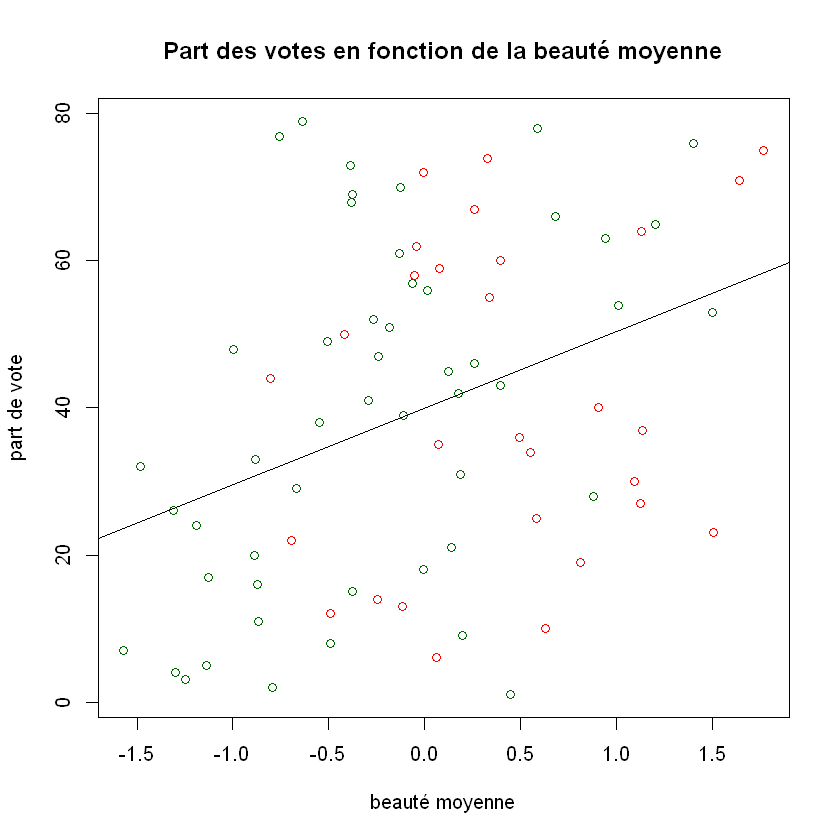

In [35]:
#On affiche la regression
plot(x =data$beaute_mean ,y = data$voteshare ,xlab = "beauté moyenne", ylab = "part de vote", col=data$color_female)
title(main = "Part des votes en fonction de la beauté moyenne")
abline(ols0$coefficients[1],ols0$coefficients[2])

5 -ii)

In [19]:
data_sortant = subset(data,incumbentcandidate==1)
data_opposant = subset(data,incumbentcandidate==0)

#Régressions
ols1 = lm(voteshare~beaute_mean,data = data_sortant)
ols2 = lm(voteshare~beaute_mean,data = data_opposant)

In [24]:
#stargazer(ols1)
#stargazer(ols2)

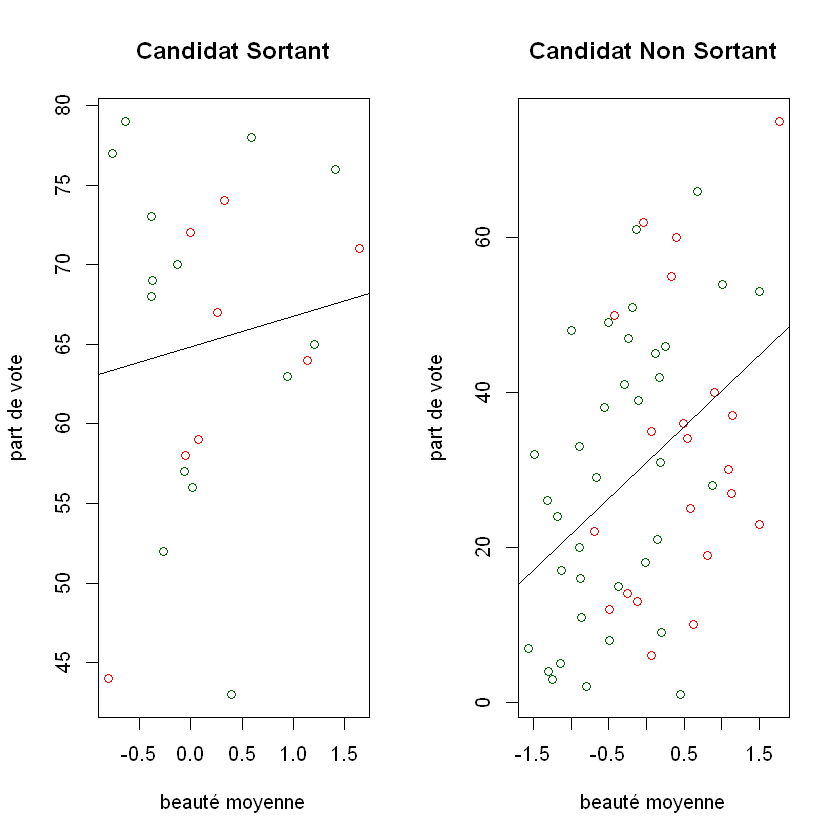

In [21]:
#On affiche les olsressions
par(mfrow = c(1,2))

#Candidats sortants
plot(x =data_sortant$beaute_mean ,y = data_sortant$voteshare ,xlab = "beauté moyenne", ylab = "part de vote", col=data_sortant$color_female)
title(main = "Candidat Sortant")
abline(ols1$coefficients[1],ols1$coefficients[2])

#Candidats opposants

plot(x =data_opposant$beaute_mean ,y = data_opposant$voteshare ,xlab = "beauté moyenne", ylab = "part de vote", col=data_opposant$color_female)
title(main = "Candidat Non Sortant")
abline(ols2$coefficients[1],ols2$coefficients[2])

#### 5 - iii)

In [25]:
ols3 = lm(voteshare~skin,data = data)
ols4 = lm(voteshare~skin,data = data_sortant)
ols5 = lm(voteshare~skin,data = data_opposant)

In [29]:
#stargazer(ols3)
#stargazer(ols4)
#stargazer(ols5)

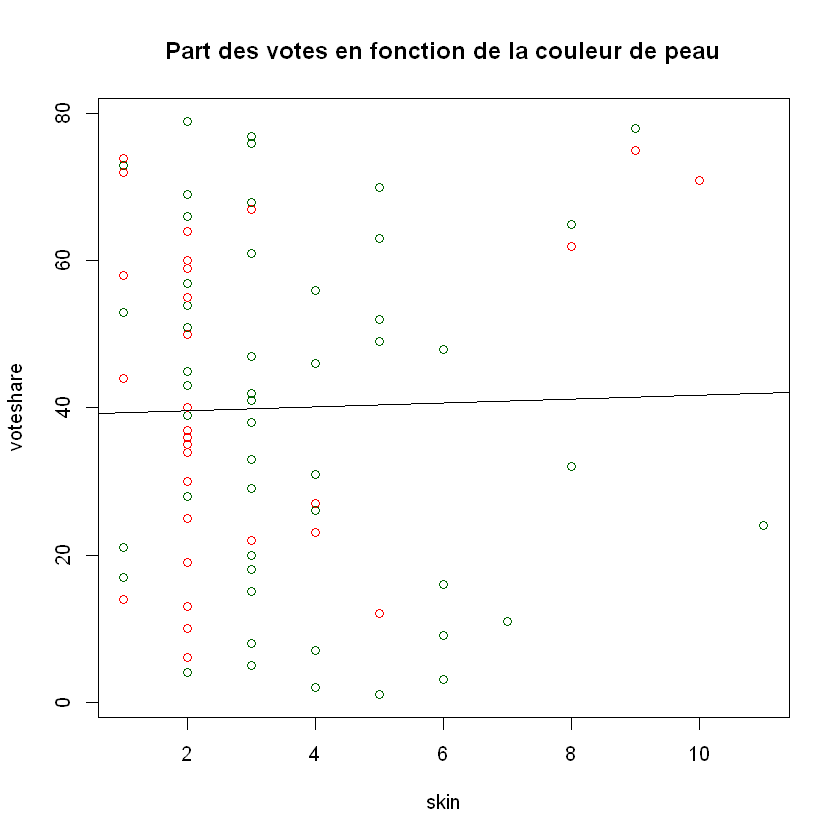

In [36]:
#Tous les candidats
plot(x = data$skin,y = data$voteshare,xlab = "skin", ylab = "voteshare",col=data$color_female)
title(main = "Part des votes en fonction de la couleur de peau")
abline(ols3$coefficients[1],ols3$coefficients[2])


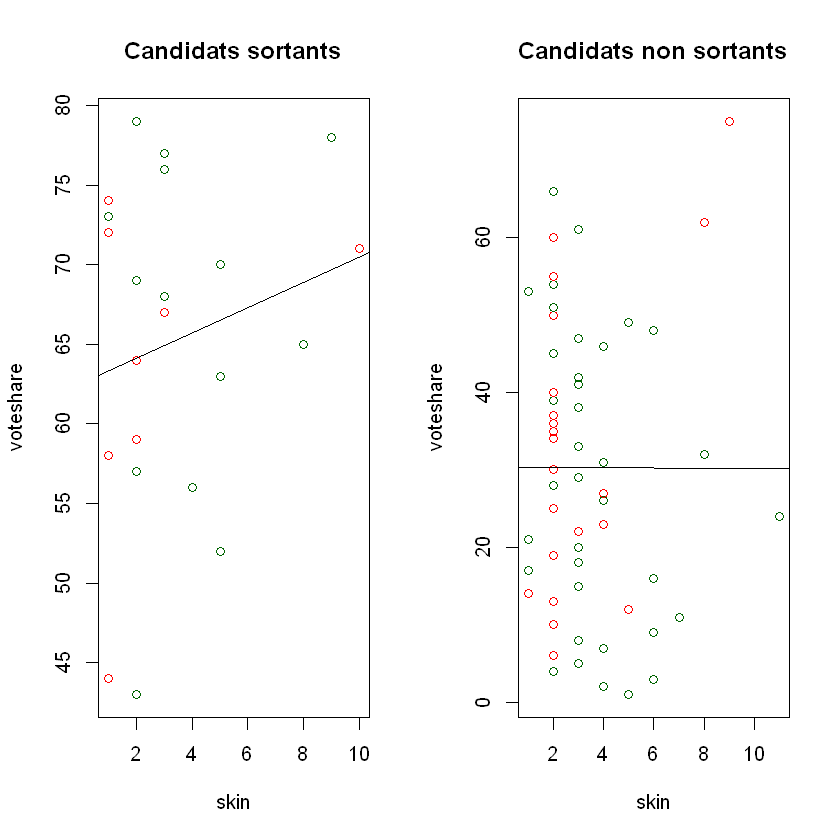

In [34]:
par(mfrow = c(1,2))
#Candidats sortants
plot(x = data_sortant[,'skin'],y = data_sortant[,'voteshare'],xlab = "skin", ylab = "voteshare",col=data_sortant$color_female)
title(main = "Candidats sortants")
abline(ols4$coefficients[1],ols4$coefficients[2])

#Candidats opposants

plot(x = data_opposant[,'skin'],y = data_opposant[,'voteshare'],xlab = "skin", ylab = "voteshare",col=data_opposant$color_female)
title(main = "Candidats non sortants")
abline(ols5$coefficients[1],ols5$coefficients[2])

#### 5 -iv)

Quelle valleur pour scinder les groupes ? :

In [46]:
sort(data$ab)[40]
sort(data$ab)[41]

[1] 0.133

[1] 0.134

Création des tables

In [50]:
data_low_ab = subset(data,ab<0.134)
data_high_ab = subset(data,ab>=0.134)

data_low_sortant = subset(data_low_ab,incumbentcandidate==1)
data_low_opposant = subset(data_low_ab,incumbentcandidate==0)
data_high_sortant = subset(data_high_ab,incumbentcandidate==1)
data_high_opposant = subset(data_high_ab,incumbentcandidate==0)

Régressions pour les candidats dans des circonscriptions avec peu d'indigènes

In [51]:
ols_low_ab1 = lm(voteshare~skin,data = data_low_ab)
ols_low_ab2 = lm(voteshare~skin,data = data_low_sortant)
ols_low_ab3 = lm(voteshare~skin,data = data_low_opposant)

In [53]:
#stargazer(ols_low_ab1)
#stargazer(ols_low_ab2)
#stargazer(ols_low_ab3)

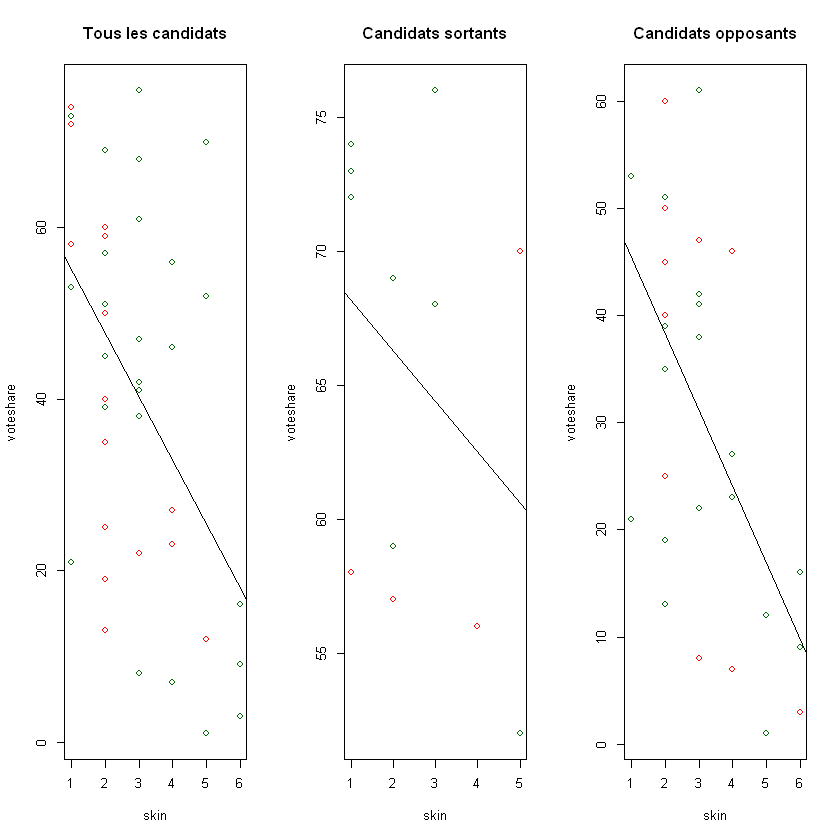

In [57]:
par(mfrow = c(1,3))

#Tous les candidats low ab
plot(x = data_low_ab$skin,y = data_low_ab$voteshare,xlab = "skin", ylab = "voteshare",col=data_low_ab$color_female)
title(main = "Tous les candidats")
abline(ols_low_ab1$coefficients[1],ols_low_ab1$coefficients[2])

#Candidats sortants low ab
plot(x = data_low_sortant$skin,y = data_low_sortant$voteshare,xlab = "skin", ylab = "voteshare",col=data_low_ab$color_female)
title(main = "Candidats sortants")
abline(ols_low_ab2$coefficients[1],ols_low_ab2$coefficients[2])

#Candidats opposants low ab
plot(x = data_low_opposant$skin,y = data_low_opposant$voteshare,xlab = "skin", ylab = "voteshare",col=data_low_ab$color_female)
title(main = "Candidats opposants")
abline(ols_low_ab3$coefficients[1],ols_low_ab3$coefficients[2])

Régressions pour les candidats dans des circonscriptions avec beaucoup d'indigènes

In [58]:
ols_high_ab1 = lm(voteshare~skin,data = data_high_ab)
ols_high_ab2 = lm(voteshare~skin,data = data_high_sortant)
ols_high_ab3 = lm(voteshare~skin,data = data_high_opposant)

In [ ]:
#stargazer(ols_high_ab1)
#stargazer(ols_high_ab2)
#stargazer(ols_high_ab3)

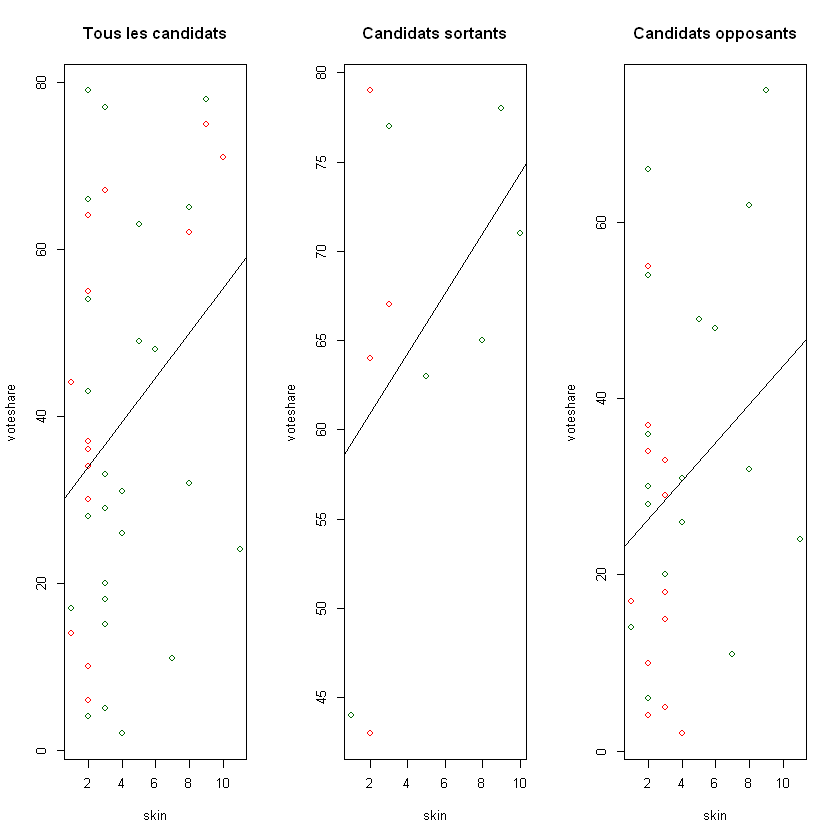

In [59]:
par(mfrow = c(1,3))

#Tous les candidats high ab
plot(x = data_high_ab$skin,y = data_high_ab$voteshare,xlab = "skin", ylab = "voteshare",col=data_high_ab$color_female)
title(main = "Tous les candidats")
abline(ols_high_ab1$coefficients[1],ols_high_ab1$coefficients[2])

#Candidats sortants high ab
plot(x = data_high_sortant$skin,y = data_high_sortant$voteshare,xlab = "skin", ylab = "voteshare",col=data_high_ab$color_female)
title(main = "Candidats sortants")
abline(ols_high_ab2$coefficients[1],ols_high_ab2$coefficients[2])

#Candidats opposants high ab
plot(x = data_high_opposant$skin,y = data_high_opposant$voteshare,xlab = "skin", ylab = "voteshare",col=data_high_ab$color_female)
title(main = "Candidats opposants")
abline(ols_high_ab3$coefficients[1],ols_high_ab3$coefficients[2])

### Question 7

In [81]:
data['true_voteshare'] = data['voteshare']*(1-0.0375)
data['Y'] = log(data['true_voteshare']/0.0375,2)

7-i)

In [82]:
reg1 = lm(Y~beaute_pond+incumbentcandidate+female+ballotorder,data = data)

reg2 = lm(Y~beaute_pond+incumbentcandidate+female+ballotorder+beaute_pond*incumbentcandidate,data = data)

reg3 = lm(Y~beaute_pond+incumbentcandidate+female+ballotorder+beaute_pond*female,data = data)

reg4 = lm(Y~skin+ab+incumbentcandidate+female+ballotorder,data = data)

reg5 = lm(Y~skin+ab+incumbentcandidate+female+ballotorder+skin*ab,data = data)

reg6 = lm(Y~beaute_pond+skin+ab+incumbentcandidate+female+ballotorder+skin*ab,data = data)

#ii)

reg7 = lm(Y~beaute_pond+skin+ab+skin*ab,data = data)

In [83]:
#stargazer(reg1)
#stargazer(reg2)
#stargazer(reg3)
#stargazer(reg4)
#stargazer(reg5)
#stargazer(reg6)
#stargazer(reg7)

### Question 8

In [84]:
normalized = function(x){ 
  moyenne = mean(x)
  variance = var(x)
  var_norm = (x-moyenne)/sqrt(variance)
  var_norm
}

data$forehead_norm = normalized(as.numeric(data$forehead))
data$nose_norm = normalized(as.numeric(data$nose))
data$chin_norm = normalized(as.numeric(data$chin))

In [85]:
#ii)Test de corrélation entre beaute_pond et les variables physiologiques
reg = lm(beaute_pond~forehead+chin+nose+incumbentcandidate+female+ballotorder, data = data)

In [86]:
#Test de Sargan
reg = lm(beaute_pond~forehead_norm+chin_norm+female+incumbentcandidate+ballotorder,data = data)
X = predict(object = reg, newdata = data)
data['instruments'] = X
reg_1 = lm(Y~instruments + incumbentcandidate + female + ballotorder ,data = data)
res = residuals(reg_1)
reg_u = lm(res~incumbentcandidate+ballotorder+female,data = data)
summary(reg_u)


Call:
lm(formula = res ~ incumbentcandidate + ballotorder + female, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4448 -0.3812  0.1338  0.6477  1.8776 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)         6.064e-17  3.252e-01       0        1
incumbentcandidate  5.854e-17  2.802e-01       0        1
ballotorder        -5.399e-17  1.077e-01       0        1
female              6.652e-17  2.629e-01       0        1

Residual standard error: 1.109 on 75 degrees of freedom
Multiple R-squared:  1.502e-32,	Adjusted R-squared:  -0.04 
F-statistic: 3.754e-31 on 3 and 75 DF,  p-value: 1


In [87]:
#Les trois ensembles
reg = lm(beaute_pond~forehead_norm+nose_norm+chin_norm+female+incumbentcandidate+ballotorder,data = data)
stargazer(reg)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: ven., avr. 19, 2019 - 19:40:05
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & beaute\_pond \\ 
\hline \\[-1.8ex] 
 forehead\_norm & $-$0.198$^{**}$ \\ 
  & (0.097) \\ 
  & \\ 
 nose\_norm & $-$0.098 \\ 
  & (0.117) \\ 
  & \\ 
 chin\_norm & 0.232$^{**}$ \\ 
  & (0.109) \\ 
  & \\ 
 female & 0.524$^{***}$ \\ 
  & (0.185) \\ 
  & \\ 
 incumbentcandidate & 0.260 \\ 
  & (0.185) \\ 
  & \\ 
 ballotorder & $-$0.134$^{*}$ \\ 
  & (0.071) \\ 
  & \\ 
 Constant & 0.037 \\ 
  & (0.214) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & 79 \\ 
R$^{2}$ & 0.269 \\ 
Adjusted R$^{2}$ & 0.208 \\ 
Residual Std. Error & 0.723 (df = 72) \\ 
F Statistic & 4.420$^{***}$ (df = 6; 72) \\ 
\hline 
\hline \\[-1.8ex] 
\tex

#### 8-iii)

In [88]:
reg = lm(beaute_pond~forehead_norm+chin_norm+female+incumbentcandidate+ballotorder,data = data)
X = predict(object = reg, newdata = data)
data$instruments = X

In [89]:
reg_1 = lm(Y~instruments + incumbentcandidate + female + ballotorder ,data = data)
res = residuals(reg_1)
reg_u = lm(res~incumbentcandidate+ballotorder+female,data = data)
summary(reg_u)
stargazer(reg_1)

reg_2 = lm(Y~instruments+incumbentcandidate+female+ballotorder+instruments*incumbentcandidate,data = data)
stargazer(reg_2)

reg_3 = lm(Y~instruments+incumbentcandidate+female+ballotorder+instruments*female,data = data)
stargazer(reg_3)

reg_6 = lm(Y~instruments+skin*ab+skin+female+incumbentcandidate+ab+ballotorder,data = data)
summary(reg_6)

reg = lm(beaute_pond~skin*ab, data = data)
summary(reg)



Call:
lm(formula = res ~ incumbentcandidate + ballotorder + female, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4448 -0.3812  0.1338  0.6477  1.8776 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)         6.064e-17  3.252e-01       0        1
incumbentcandidate  5.854e-17  2.802e-01       0        1
ballotorder        -5.399e-17  1.077e-01       0        1
female              6.652e-17  2.629e-01       0        1

Residual standard error: 1.109 on 75 degrees of freedom
Multiple R-squared:  1.502e-32,	Adjusted R-squared:  -0.04 
F-statistic: 3.754e-31 on 3 and 75 DF,  p-value: 1



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: ven., avr. 19, 2019 - 19:40:05
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & Y \\ 
\hline \\[-1.8ex] 
 instruments & 0.772 \\ 
  & (0.588) \\ 
  & \\ 
 incumbentcandidate & 1.229$^{***}$ \\ 
  & (0.330) \\ 
  & \\ 
 female & $-$0.227 \\ 
  & (0.421) \\ 
  & \\ 
 ballotorder & $-$0.107 \\ 
  & (0.129) \\ 
  & \\ 
 Constant & 9.594$^{***}$ \\ 
  & (0.328) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & 79 \\ 
R$^{2}$ & 0.323 \\ 
Adjusted R$^{2}$ & 0.287 \\ 
Residual Std. Error & 1.117 (df = 74) \\ 
F Statistic & 8.841$^{***}$ (df = 4; 74) \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\ 
\end{tabular} 
\end{table} 

% Table c


Call:
lm(formula = Y ~ instruments + skin * ab + skin + female + incumbentcandidate + 
    ab + ballotorder, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0739 -0.4432  0.1771  0.7248  1.7448 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        10.28016    0.49609  20.722  < 2e-16 ***
instruments         0.54391    0.59477   0.914 0.363559    
skin               -0.24051    0.11692  -2.057 0.043352 *  
ab                 -1.52046    0.96881  -1.569 0.120998    
female             -0.27411    0.42095  -0.651 0.517040    
incumbentcandidate  1.28205    0.32548   3.939 0.000189 ***
ballotorder        -0.09856    0.12995  -0.758 0.450704    
skin:ab             0.46060    0.20519   2.245 0.027901 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.099 on 71 degrees of freedom
Multiple R-squared:  0.3711,	Adjusted R-squared:  0.3091 
F-statistic: 5.984 on 7 and 71 DF,  p-value: 1


Call:
lm(formula = beaute_pond ~ skin * ab, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43819 -0.61107  0.01595  0.53446  1.69330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.24592    0.27799   0.885    0.379
skin        -0.06962    0.08004  -0.870    0.387
ab          -0.76007    0.68919  -1.103    0.274
skin:ab      0.16470    0.14326   1.150    0.254

Residual standard error: 0.8206 on 75 degrees of freedom
Multiple R-squared:  0.01826,	Adjusted R-squared:  -0.02101 
F-statistic: 0.465 on 3 and 75 DF,  p-value: 0.7076


### Question 9

In [90]:
logit1 <- glm(winner ~beaute_pond+incumbentcandidate+female+ballotorder,family=binomial(link='logit'),data=data)

logit2 <- glm(winner ~beaute_pond+incumbentcandidate+female+ballotorder+beaute_pond*incumbentcandidate,family=binomial(link='logit'),data=data)

logit3 <- glm(winner ~beaute_pond+incumbentcandidate+female+ballotorder+beaute_pond*female,family=binomial(link='logit'),data=data)

logit4 <- glm(winner ~skin+ab+incumbentcandidate+female+ballotorder,family=binomial(link='logit'),data=data)

logit5 <- glm(winner ~skin+ab+incumbentcandidate+female+ballotorder+skin*ab,family=binomial(link='logit'),data=data)

logit6 <- glm(winner ~beaute_pond+skin+ab+incumbentcandidate+female+ballotorder+skin*ab,family=binomial(link='logit'),data=data)

logit7 <- glm(winner ~beaute_pond+skin+ab+skin*ab,family=binomial(link='logit'),data=data)

In [91]:
#stargazer(logit1)
#stargazer(logit2)
#stargazer(logit3)
#stargazer(logit4)
#stargazer(logit5)
#stargazer(logit6)

#stargazer(logit7)

### Question 10

In [92]:
reg_preliminaire1 = lm(beaute_pond~ballotorder+incumbentcandidate+female+chin, data = data)
eta1 = residuals(reg_preliminaire1)
probit1 = glm(winner~beaute_pond+ballotorder+female+incumbentcandidate+eta1,data = data,family = binomial(link='probit'))

In [93]:
#stargazer(probit1)

### Question 11

In [94]:
multi1 <-polr(winner2 ~ beaute_pond+skin+ab+female+skin*ab+beaute_pond*female,data=data, Hess=TRUE)

In [95]:
#stargazer(multi1)